<a href="https://colab.research.google.com/github/djvaroli/samsung_oct/blob/Janhavi-Colab-Notebooks/JG_OCT_PretrainedSimCLR_Reduced_Train_Dataset_10per.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''%cp drive/MyDrive/OCT_Project/ZhangLabData.zip .
!unzip ZhangLabData.zip'''

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Samsung-OCT-Project-Work/')
pwd = os.getcwd()
print(pwd)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Samsung-OCT-Project-Work


In [2]:
!ls


 ahDdMcSIdcyTfoy
 HAsIhWpGWVbMVLA
 HBMEINbkLGPLhEn
 JG_OCT_PretrainedSimCLR_Full_Train_Dataset.ipynb
' JG_OCT_PretrainedSimCLR_Reduced_Train_Dataset.ipynb'
 KuoJPrsqtxHXGny
 MyResNet50
 processed_data
 processed_data.zip_.gstmp
 resnet50-img-aug
 resnet50_model_plot.png
 samsung_oct
 samsung-oct-super-model-v0.ipynb
 samsung-oct-super-model-v3.ipynb
 samsung-oct-super-model-v4.ipynb
 simclrv2_test_plot.png
 StLmmsAPKRAfQyU
 VGG19_rev0.h5
 VGG19-samsung-oct-super-model-v4.ipynb
 VGG_results.csv
 VGG_results_load_model.csv
 VGG_results_load_model.gsheet
 wandb


In [3]:
import pandas as pd
import numpy as np

In [4]:
#function to convert data files to dataframe
def load_data(folder):
  X=[]
  Y=[]
  Z=[]
  for folderName in os.listdir(folder):
    if not folderName.startswith('.'):
      if folderName == '0':
        label = 0
      elif folderName == '1':
        label = 1
      elif folderName == '2':
        label = 2
      elif folderName == '3':
        label = 3
      else:
        label = 4

    for file in os.listdir(folder+'/'+folderName):
      if not file.startswith('.'):
        X.append(file)
        Y.append(label)
        Z.append(folder+'/'+folderName+'/'+file)
  return pd.DataFrame(np.hstack((np.asarray(X).reshape(-1,1),np.asarray(Z).reshape(-1,1), np.asarray(Y).reshape(-1,1))),columns=['filename','path','Class']).sort_values('Class')


In [5]:
test_data = load_data('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/test/')
#train_data = load_data('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train/')
val_data = load_data('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/val/')

OSError: ignored

In [7]:
train_data = load_data('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train/')

In [9]:
val_data = load_data('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/val/')

In [10]:
print(train_data.shape,test_data.shape,val_data.shape)

(83484, 3) (968, 3) (32, 3)


In [11]:
# Creating directory for storing 10% train data
os.chdir('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train_data_10per/')
os.getcwd()
!mkdir 0
!mkdir 1
!mkdir 2
!mkdir 3
!ls

0  1  2  3


In [12]:
# Creating reduced train dataset
# Selecting smaller sample size 
def sample_data(data, sample_size):
  if sample_size == data.shape[0]:
    return data
  class_weights = dict(data["Class"].value_counts()/data.shape[0])
  print("Before sub-sampling=", class_weights)
  df0 = data[data["Class"]=='0'].sample(n=min(int(round(sample_size * class_weights['0'])),len(data[data["Class"]=='0'])))
  df1 = data[data["Class"]=='1'].sample(n=min(int(round(sample_size * class_weights['1'])),len(data[data["Class"]=='1'])))
  df2 = data[data["Class"]=='2'].sample(n=min(int(round(sample_size * class_weights['2'])),len(data[data["Class"]=='2'])))
  df3 = data[data["Class"]=='3'].sample(n=min(int(round(sample_size * class_weights['3'])),len(data[data["Class"]=='3'])))
  return pd.concat([df0,df1,df2,df3])

In [13]:
train_10per = int((10/100)*(train_data.shape[0]))
print("10% reduced train data sample size=",train_10per)
train_data_red = sample_data(train_data,train_10per)
class_weights = dict(train_data_red["Class"].value_counts()/train_data_red.shape[0])
print("Sub-sampled train data=", class_weights)
print(train_data.shape, train_data_red.shape)

10% reduced train data sample size= 8348
Before sub-sampling= {'0': 0.4456542571031575, '3': 0.3152101001389488, '1': 0.13593023812946192, '2': 0.1032054046284318}
Sub-sampled train data= {'0': 0.4456157163392429, '3': 0.3151653090560613, '1': 0.13596070915189268, '2': 0.10325826545280306}
(83484, 3) (8348, 3)


In [15]:
import shutil
train_files = train_data_red.path.to_list()
for filenum in range(len(train_files)):
  x = train_files[filenum]
  x_split = x.split('/')
  filename = x_split[-1]
  separator = '/'
  x_path = separator.join(x_split[:-1])
  #print(x_path)
  os.chdir(x_path)
  if '0' in x_path: 
    #print(x_path)
    shutil.copy(filename, '../../train_data_10per/0/')
  elif '1' in x_path:
    shutil.copy(filename, '../../train_data_10per/1/')
  elif '2' in x_path:
    shutil.copy(filename, '../../train_data_10per/2/')
  else:
    shutil.copy(filename, '../../train_data_10per/3/')
 

In [16]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train_data_10per/')
!ls ./*/* | wc -l
os.chdir('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/test/')
!ls ./*/* | wc -l
os.chdir('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/val/')
!ls ./*/* | wc -l

8348
968
32


In [25]:
# Working dir
os.chdir('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/')
os.getcwd()



'/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work'

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
seed = 42
val_split   = 0.02
train_split = 1 - val_split
batch_size = 32
IMG_SIZE=224

In [28]:


ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    './processed_data/data/train_data_10per',
    labels="inferred",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(224, 224),
    shuffle=True,
    seed=seed,
    validation_split=val_split,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
    )
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    './processed_data/data/train_data_10per',
    labels="inferred",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(224, 224),
    shuffle=True,
    seed=seed,
    validation_split=val_split,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    )

ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'processed_data/data/test',
    labels="inferred",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(224, 224),
    shuffle=True,
    seed=seed,
    interpolation="bilinear",
    follow_links=False,
    )

Found 8348 files belonging to 4 classes.
Using 166 files for validation.
Found 8348 files belonging to 4 classes.
Using 8182 files for training.
Found 968 files belonging to 4 classes.


# Feature Extraction with Pretrained SimCLR
- Ultimately we want to train a SimCLR model with the wealth of OCT images
- as a zeroth step, we ask how well are SimCLR pretrained on ImageNet works on the unseen OCT images domain.
- we use SimCLR as a feature extractor and try to see how well a simple linear classification head (multi-class logistic regression) works in terms of distinguiishing between classes


In [29]:
#@title Load module and construct the computation graph
import tensorflow_hub as hub
import tensorflow as tf
# Load the base network and set it to non-trainable (for speedup fine-tuning)
hub_path = 'gs://simclr-checkpoints/simclrv2/finetuned_100pct/r50_1x_sk0/hub/'

In [30]:
input_layer  = tf.keras.layers.Input((224,224,3))
simclr_layer = hub.KerasLayer(hub_path, trainable=False,)
classification_head = tf.keras.layers.Dense(4, activation='softmax')


model = tf.keras.Sequential([input_layer, 
                             simclr_layer,
                             classification_head])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              34277672  
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 34,285,868
Trainable params: 8,196
Non-trainable params: 34,277,672
_________________________________________________________________


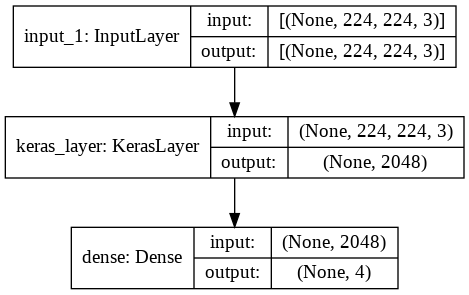

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='simclrv2_test_plot.png',show_shapes=True, show_layer_names=True)

In [33]:
metrics = ['accuracy']
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', ),
             tf.keras.callbacks.ModelCheckpoint(filepath='resnet_model.{epoch:02d}-{val_loss:.2f}.h5'),]
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=metrics)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [35]:
import os

# simple version for working with CWD
nCNV = len([name for name in os.listdir('./processed_data/data/train_data_10per/0')])
nDME = len([name for name in os.listdir('./processed_data/data/train_data_10per/1')])
nDRUSEN = len([name for name in os.listdir('./processed_data/data/train_data_10per/2')])
nNORMAL = len([name for name in os.listdir('./processed_data/data/train_data_10per/3')])

ncount = np.array([nCNV, nDME, nDRUSEN, nNORMAL])
ntotal = sum(ncount)

weights = ntotal/ncount/ len(ncount)
weights /= weights.min()
class_weight = {i: w for i, w in enumerate(weights)}

In [36]:
print(nCNV, nDME, nDRUSEN, nNORMAL)

3720 1135 862 2631


In [37]:
print(ncount)

[3720 1135  862 2631]


In [38]:
print(ntotal)

8348


In [39]:
print(weights)

[1.         3.27753304 4.31554524 1.41391106]


# Retrieve the Representation
- we run our examples through the SimCLR to retrieve the embedding as seen by the nerual network


In [40]:
def get_representation(dataset, max_batch=500):
  out_rep, out_label = [], []
  count = 0
  for img, lb in dataset:
    out_rep.append(simclr_layer(img).numpy())
    out_label.append(lb.numpy())
    if count % 100 == 0: print(f'count = {count}')
    if count > max_batch: break
    count += 1
  out_label = np.hstack(out_label)
  out_rep   = np.vstack(out_rep)
  return out_rep, out_label

In [41]:
# train_rep, train_lb = get_representation(ds_train)
test_rep,  test_lb = get_representation(ds_test)

count = 0


In [42]:
train_rep, train_lb = get_representation(ds_train)

count = 0
count = 100
count = 200


In [43]:
train_rep = train_rep / np.sqrt(np.square(train_rep).mean(axis=-1, keepdims=True))
test_rep  = test_rep  / np.sqrt(np.square(test_rep).mean(axis=-1, keepdims=True))

In [44]:
train_rep.shape

(8182, 2048)

In [46]:
import os

# simple version for working with CWD
nCNV = len([name for name in os.listdir('./processed_data/data/train_data_10per/0')])
nDME = len([name for name in os.listdir('./processed_data/data/train_data_10per/1')])
nDRUSEN = len([name for name in os.listdir('./processed_data/data/train_data_10per/2')])
nNORMAL = len([name for name in os.listdir('./processed_data/data/train_data_10per/3')])

ncount = np.array([nCNV, nDME, nDRUSEN, nNORMAL])
ntotal = sum(ncount)

weights = ntotal/ncount/ len(ncount)
weights /= weights.min()
class_weight = {i: w for i, w in enumerate(weights)}

# Fitting a Linear Regression Model
- attach a dense layer with 4 outputs with softmax activation
- minimize the cross-entropy taking into the account of the inherent imbalance between the 4 classes

In [47]:
learning_rate = 1.0e-3


linearRegression = tf.keras.Sequential([tf.keras.layers.Input(2048),
                                       tf.keras.layers.Dense(4, activation='softmax')])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
linearRegression.compile(loss='sparse_categorical_crossentropy', 
                         metrics='accuracy', 
                         optimizer=optimizer)

In [48]:
history = linearRegression.fit(train_rep, 
                              train_lb, 
                              batch_size=32, 
                              epochs=100,
                              class_weight=class_weight,
                              validation_data=(test_rep, test_lb),)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/100
256/256 [==============================] - 2s 4ms/step - loss: 2.4714 - accuracy: 0.3299 - val_loss: 1.3235 - val_accuracy: 0.4039
Epoch 2/100
256/256 [==============================] - 1s 3ms/step - loss: 2.3310 - accuracy: 0.4198 - val_loss: 1.2139 - val_accuracy: 0.4298
Epoch 3/100
256/256 [==============================] - 1s 3ms/step - loss: 2.2426 - accuracy: 0.4616 - val_loss: 1.1924 - val_accuracy: 0.4318
Epoch 4/100
256/256 [==============================] - 1s 3ms/step - loss: 2.1797 - accuracy: 0.4901 - val_loss: 1.0565 - val_accuracy: 0.6198
Epoch 5/100
256/256 [==============================] - 1s 3ms/step - loss: 2.1255 - accuracy: 0.5067 - val_loss: 1.0222 - val_accuracy: 0.6384
Epoch 6/100
256/256 [==============================] - 1s 3ms/step - loss: 2.0791 - accuracy: 0.5276 - val_loss: 1.0591 - val_accuracy: 0.5506
Epoc

In [49]:
history = linearRegression.fit(train_rep, 
                               train_lb, 
                               batch_size=32, 
                               epochs=400,
                               class_weight=class_weight,
                               validation_data=(test_rep, test_lb),
                               initial_epoch=200)

Epoch 201/400
256/256 [==============================] - 1s 3ms/step - loss: 1.4854 - accuracy: 0.6902 - val_loss: 0.6553 - val_accuracy: 0.7541
Epoch 202/400
256/256 [==============================] - 1s 3ms/step - loss: 1.4884 - accuracy: 0.6904 - val_loss: 0.7249 - val_accuracy: 0.6911
Epoch 203/400
256/256 [==============================] - 1s 3ms/step - loss: 1.4924 - accuracy: 0.6936 - val_loss: 0.6796 - val_accuracy: 0.7376
Epoch 204/400
256/256 [==============================] - 1s 3ms/step - loss: 1.4755 - accuracy: 0.6930 - val_loss: 0.6740 - val_accuracy: 0.7335
Epoch 205/400
256/256 [==============================] - 1s 3ms/step - loss: 1.4846 - accuracy: 0.6869 - val_loss: 0.6985 - val_accuracy: 0.7159
Epoch 206/400
256/256 [==============================] - 1s 3ms/step - loss: 1.4747 - accuracy: 0.6926 - val_loss: 0.6473 - val_accuracy: 0.7624
Epoch 207/400
256/256 [==============================] - 1s 3ms/step - loss: 1.4785 - accuracy: 0.6926 - val_loss: 0.8379 - val_ac

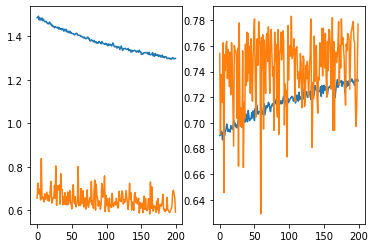

In [50]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
ax1.plot(linearRegression.history.history['loss'])
ax1.plot(linearRegression.history.history['val_loss'])

ax2 = f.add_subplot(1,2,2)
ax2.plot(linearRegression.history.history['accuracy'])
ax2.plot(linearRegression.history.history['val_accuracy'])

In [51]:
ypred_train = linearRegression(train_rep).numpy().argmax(axis=-1)
ypred_test  = linearRegression(test_rep).numpy().argmax(axis=-1)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(train_lb, ypred_train))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      3653
           1       0.60      0.76      0.67      1121
           2       0.36      0.78      0.50       838
           3       0.88      0.58      0.70      2570

    accuracy                           0.73      8182
   macro avg       0.69      0.73      0.68      8182
weighted avg       0.80      0.73      0.75      8182



In [54]:
print(classification_report(test_lb, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       242
           1       0.82      0.78      0.80       242
           2       0.65      0.73      0.69       242
           3       0.83      0.69      0.75       242

    accuracy                           0.78       968
   macro avg       0.78      0.78      0.78       968
weighted avg       0.78      0.78      0.78       968



# NOT BAD!!
- with only a linear regression, we achieve an overall accuracy of 65%, as opposed to a completely random guess with gives 25 %!
- a good baseline on a SimCLR trained on the actual image distribution! 

In [ ]:
# http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines
# https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#optional_set_the_correct_initial_bias